In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

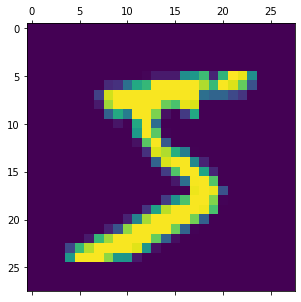

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 2s 888us/step - loss: 0.2383 - accuracy: 0.9325
Epoch 2/6
1875/1875 [==============================] - 2s 885us/step - loss: 0.1003 - accuracy: 0.9708
Epoch 3/6
1875/1875 [==============================] - 2s 907us/step - loss: 0.0676 - accuracy: 0.9790
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0479 - accuracy: 0.9849
Epoch 5/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0379 - accuracy: 0.9882
Epoch 6/6
1875/1875 [==============================] - 2s 969us/step - loss: 0.0269 - accuracy: 0.9916


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 609us/step - loss: 0.0790 - accuracy: 0.9778


[0.07900923490524292, 0.9778000116348267]

Text(69.0, 0.5, 'Truth')

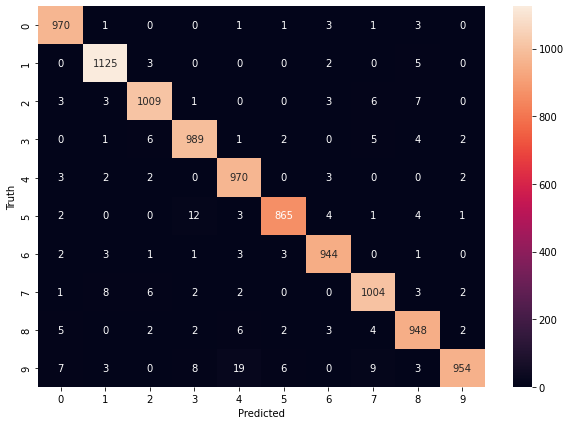

In [36]:
import seaborn as sn
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
for x in range(0,11):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img]))
    img=img/255
    img_flat = img.reshape(len(img), 28*28)
    prediction = model.predict(img_flat)
    print("predict = ",np.argmax(prediction))

predict =  4
predict =  2
predict =  1
predict =  3
predict =  7
predict =  8
predict =  5
predict =  6
predict =  0
predict =  9
predict =  2
